In [1]:
import sys
sys.path.append("..")
import pickle as pkl
import numpy as np
import pandas
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import os
import networkx as nx
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.colors import SymLogNorm
from coh_tools import map_to_ecog

In [2]:
import matplotlib
new_cmap = sns.color_palette("BuPu", as_cmap=True)
cols = [new_cmap(80), new_cmap(130), new_cmap(170), new_cmap(220)]
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.family'] = "arial"
matplotlib.rcParams['font.size'] = "7"

In [3]:
os.chdir("../../opto_data_analysis/pickled")
os.listdir()
locations = pkl.load(open("electrode_positions.pkl", "rb"))
os.chdir("../csvs")
ecog_map = map_to_ecog(np.arange(1, 97), want_data=True, csv_dir = "./")


In [4]:
# Get experiment info
# os.chdir("../../../lab/opto_data_analysis/csvs")
# os.chdir(r"C:\Users\julienb\lab\oe_data_analysis\csvs")
experiments = pandas.read_csv('table_of_experiments.csv')
experiments['keyname'] = experiments['File Name'].str[:-4]

M1_sites = pandas.read_csv('get_sessions.csv')

In [5]:
experiments

Experiment   Monkey  YYYYMMDD   Session PREAMP  \
0    Experiment1  MonkeyG  20150908  Session2     M1   
1    Experiment2  MonkeyG  20150908  Session3     M1   
2    Experiment3  MonkeyG  20150908  Session4     M1   
3    Experiment4  MonkeyG  20150909  Session2     M1   
4    Experiment5  MonkeyG  20150909  Session3     M1   
..           ...      ...       ...       ...    ...   
64  Experiment65  MonkeyJ  20160627  Session2     S1   
65  Experiment66  MonkeyJ  20160630  Session1     S1   
66  Experiment67  MonkeyJ  20160630  Session3     S1   
67  Experiment68  MonkeyJ  20160702  Session2     S1   
68  Experiment69  MonkeyJ  20160702  Session4     S1   

                           File Name  stim_Coh_from  stim_Coh_to  \
0   MonkeyG_20150908_Session2_M1.zip             46           63   
1   MonkeyG_20150908_Session3_M1.zip             48           43   
2   MonkeyG_20150908_Session4_M1.zip             48           16   
3   MonkeyG_20150909_Session2_M1.zip             48           12   
4   MonkeyG_20150909_Session3_M1.zip             53           27   
..                               ...            ...          ...   
64  MonkeyJ_20160627_Session2_S1.zip             39           14   
65  MonkeyJ_20160630_Session1_S1.zip             62           55   
66  MonkeyJ_20160630_Session3_S1.zip             58           63   
67  MonkeyJ_20160702_Session2_S1.zip             50           37   
68  MonkeyJ_20160702_Session4_S1.zip             44           64   

    Number of Lasers in Experiment  Number of Lasers during Conditioning  \
0                                2                                     2   
1                                2                                     2   
2                                2                                     2   
3                                2                                     2   
4                                2                                     2   
..                             ...                                   ...   
64                               2                                     2   
65                               2                                     2   
66                               2                                     2   
67                               2                                     2   
68                               2                                     2   

    Delay                       keyname   one   two  doubles  singles  
0    10ms  MonkeyG_20150908_Session2_M1  True  True     True    False  
1    10ms  MonkeyG_20150908_Session3_M1  True  True     True    False  
2    10ms  MonkeyG_20150908_Session4_M1  True  True     True    False  
3    10ms  MonkeyG_20150909_Session2_M1  True  True     True    False  
4    10ms  MonkeyG_20150909_Session3_M1  True  True     True    False  
..    ...                           ...   ...   ...      ...      ...  
64  100ms  MonkeyJ_20160627_Session2_S1  True  True     True    False  
65  100ms  MonkeyJ_20160630_Session1_S1  True  True     True    False  
66   10ms  MonkeyJ_20160630_Session3_S1  True  True     True    False  
67   10ms  MonkeyJ_20160702_Session2_S1  True  True     True    False  
68  100ms  MonkeyJ_20160702_Session4_S1  True  True     True    False  

[69 rows x 16 columns]

In [6]:
# os.chdir("../../../Desktop/GDrive/opto_data")
# os.chdir("../../data/opto_data")
os.chdir("D:\\gdrive\\opto_data\\final")

In [7]:
data = pkl.load(open("full_data_withPreds.pkl", "rb"))

In [8]:
data.keys()

dict_keys(['theta', 'beta', 'gamma', 'high_gamma'])

In [9]:
data["theta"].keys()

Index(['index', 'Initial_coh', 'Distance', 'Coh_proj', 'Phase',
       'Pair_avg_net_coh', 'Elec_cov', 'Time_cov', 'Avg_coh_to_stim',
       'Monkeys', 'Block_num', 'Delays', 'Both_M1', 'Both_S1',
       'Las1_distance_to_closer', 'Las1_distance_to_further',
       'Las2_distance_to_closer', 'Las2_distance_to_further', 'Coh_diff_mag',
       'End_diff', 'cond_diff_Y', 'diff_Y', 'Experiment_block_key',
       'From_electrodes', 'To_electrodes', 'Full_preds', 'Prot_preds'],
      dtype='object')

In [10]:
data["theta"].head()

index  Initial_coh  Distance  Coh_proj     Phase  Pair_avg_net_coh  \
0  492941     0.952099  1.000000  0.683459  0.115350          1.579083   
1  492942     0.944585  2.000000  0.649675  0.017746          1.538488   
2  492943     0.937517  3.000000  0.678204  0.146653          1.573542   
3  492944     0.990136  1.000000  0.687453  0.005484          1.584079   
4  492945     0.898860  1.414214  0.661391  0.219731          1.554808   

   Elec_cov  Time_cov  Avg_coh_to_stim Monkeys  ...  Las2_distance_to_further  \
0  0.053765  0.013378         0.959928       G  ...                  4.242641   
1  0.050761  0.013337         0.915096       G  ...                  4.242641   
2  0.052848  0.013399         0.960394       G  ...                  4.242641   
3  0.054844  0.011732         0.945288       G  ...                  4.242641   
4  0.050409  0.013670         0.955320       G  ...                  4.242641   

   Coh_diff_mag  End_diff  cond_diff_Y    diff_Y  \
0      0.040484 -0.082712    -0.022078 -0.033715   
1      0.043444 -0.136555    -0.060024 -0.046087   
2      0.048440 -0.085393    -0.021879 -0.033444   
3      0.007034 -0.078851    -0.019558 -0.034019   
4      0.066103 -0.070473    -0.025522 -0.049805   

           Experiment_block_key  From_electrodes  To_electrodes  Full_preds  \
0  MonkeyG_20150915_Session2_S1                1              2   -0.038612   
1  MonkeyG_20150915_Session2_S1                1              3   -0.029889   
2  MonkeyG_20150915_Session2_S1                1              4   -0.033107   
3  MonkeyG_20150915_Session2_S1                1              5   -0.038864   
4  MonkeyG_20150915_Session2_S1                1              6   -0.042724   

   Prot_preds  
0    0.023093  
1    0.027583  
2    0.030704  
3    0.021300  
4    0.025677  

[5 rows x 27 columns]

In [11]:
# for band in data.keys():
#     data[band] = data[band].dropna()

In [12]:
# All data, whole-session changes
# All features

for band in data.keys():
    print(band)
    formula_all_wholesess = "End_diff ~ Distance + Phase + Delays + Monkeys + Block_num + Both_M1 + Both_S1 + \
    Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further + \
    Initial_coh + Pair_avg_net_coh  + Elec_cov + \
    Time_cov + Coh_proj + Coh_diff_mag"
    mod1 = ols(formula=formula_all_wholesess, data=data[band])
    res1 = mod1.fit()
    print(res1.rsquared)
    print(mean_squared_error(data[band]["cond_diff_Y"], res1.predict(data[band])))
    
    formula_protocol = "End_diff ~ Distance + Phase + Delays + Monkeys + Block_num + Both_M1 + Both_S1 + \
    Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further"
    mod_protocol = ols(formula=formula_protocol, data=data[band])
    res_protocol = mod_protocol.fit()
    print(res_protocol.rsquared)
    print(mean_squared_error(data[band]["cond_diff_Y"], res_protocol.predict(data[band])))


    formula_graph = "End_diff ~ Initial_coh + Pair_avg_net_coh  + Elec_cov + \
    Time_cov + Coh_proj + Coh_diff_mag"
    mod_graph = ols(formula=formula_graph, data=data[band])
    res_graph = mod_graph.fit()
    print(res_graph.rsquared)
    print(mean_squared_error(data[band]["cond_diff_Y"], res_graph.predict(data[band])))


theta
0.14109918997532833
0.006623036127605315
0.048417007900586784
0.007219560356378755
0.045791830450566895
0.006526541224536812
beta
0.1036088774342806
0.0033908621551561415
0.0606145926741154
0.003567307712793719
0.03832481898026807
0.0031212698256112724
gamma
0.12408104115339313
0.002926407061931236
0.04784780779550524
0.003084443595320965
0.039507498466082036
0.002775307050358887
high_gamma
0.1734625689617727
0.0031228749881203736
0.059929851127075384
0.0035326087959898556
0.08268675655296742
0.0030494561404373097


In [13]:
# All data, whole-session changes
# All features

for band in data.keys():
    print(band)
    print(r2_score(data[band]["cond_diff_Y"], data[band]["Full_preds"]))
    
    print(r2_score(data[band]["cond_diff_Y"], data[band]["Prot_preds"]))


theta
0.24152719072045026
0.0463824983266613
beta
0.1267663640680976
0.026342006206686697
gamma
-401.1685266812541
0.05676327323113628
high_gamma
0.3286906385472699
0.07954309947871208


In [14]:
repr_r_sessions = []
repr_m_sessions = []
# Get r squareds of individual sessions
for session in data["high_gamma"]["Experiment_block_key"].unique():    
    session_data = data["high_gamma"][data["high_gamma"]["Experiment_block_key"] == session]

    for block in range(1, 6):
        session_block_data = session_data[session_data["Block_num"] == block]
        block_r2 = r2_score(session_block_data["cond_diff_Y"], session_block_data["Full_preds"])
        block_prot_r2 = r2_score(session_block_data["cond_diff_Y"], session_block_data["Prot_preds"])
        if (.2 < block_r2):
            print(session)

            print(block)
            print(block_r2)
            print(block_prot_r2)
#             if (block_r2 > .):
            repr_r_sessions.append([session, block])
                
#         block_mse = mean_squared_error(session_block_data["cond_diff_Y"], res1.predict(session_block_data))

#         if (block_mse < .0025):
#             repr_m_sessions.append([[session, block]])

MonkeyG_20150915_Session2_S1
1
0.39336086280143157
-0.45200032211188823
MonkeyG_20150915_Session2_S1
4
0.3754866198517647
-0.039671797051279656
MonkeyG_20150915_Session3_S1
1
0.3786986767627649
-0.1376547554481813
MonkeyG_20150915_Session3_S1
2
0.20690972331785307
0.04100398334883071
MonkeyG_20150916_Session4_S1
1
0.23589855543338922
-0.29121239387629094
MonkeyG_20150917_Session3_S1
3
0.3037264431531914
0.12896561658771877
MonkeyG_20150921_Session3_S1
3
0.22416202231224847
-1.0870139092085473
MonkeyG_20150921_Session5_S1
2
0.5813330475045853
-0.10976185996917076
MonkeyG_20150922_Session1_S1
2
0.3428421490209591
0.008606377890969297
MonkeyG_20150925_Session1_S1
1
0.4783519282681439
-0.32864862515157944


In [15]:
repr_r_sessions

[['MonkeyG_20150915_Session2_S1', 1],
 ['MonkeyG_20150915_Session2_S1', 4],
 ['MonkeyG_20150915_Session3_S1', 1],
 ['MonkeyG_20150915_Session3_S1', 2],
 ['MonkeyG_20150916_Session4_S1', 1],
 ['MonkeyG_20150917_Session3_S1', 3],
 ['MonkeyG_20150921_Session3_S1', 3],
 ['MonkeyG_20150921_Session5_S1', 2],
 ['MonkeyG_20150922_Session1_S1', 2],
 ['MonkeyG_20150925_Session1_S1', 1]]

In [11]:
def get_M1_sites_from_experiment(session):
    subject = experiments[experiments["keyname"] == session]['Monkey'].values[0][-1]
    date = experiments[experiments["keyname"] == session]["YYYYMMDD"].values[0]
    sess = experiments[experiments["keyname"] == session]["Session"].values[0][-1]

    my_M1 = M1_sites[M1_sites['name'].str.startswith(subject)]
    my_M1 = my_M1[my_M1["date"] == date]
    my_M1 = my_M1[my_M1["session"] == int(sess)]

    return [int(e) for e in my_M1["M1_sites"].values[0].split(',')]

['MonkeyG_20150921_Session5_S1', 2]


<ipython-input-24-4447f3efed18>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sess1=data["high_gamma"][data["high_gamma"]["Experiment_block_key"]==session][data["high_gamma"]["Block_num"]==block]


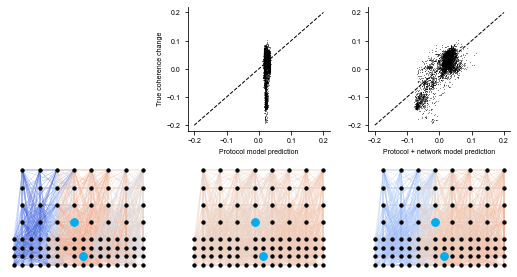

In [24]:
# for session in repr_r_sessions:
for session in [['MonkeyG_20150921_Session5_S1', 2]]:
    print(session)
    session, block = session

    laser_from = int(experiments[experiments['keyname'] == session]["stim_Coh_from"])
    laser_to = int(experiments[experiments['keyname'] == session]["stim_Coh_to"])
    sess1=data["high_gamma"][data["high_gamma"]["Experiment_block_key"]==session][data["high_gamma"]["Block_num"]==block]

    v_scale = .15
    figs, axs = plt.subplots(2, 3, figsize=(7.2,4))

    sess1_copy = sess1[sess1["Distance"] < 6]

    # Build your graph
    G=nx.from_pandas_edgelist(sess1_copy, 'From_electrodes', 'To_electrodes', ['Full_preds', 'Prot_preds', 'cond_diff_Y'])

    M1 = get_M1_sites_from_experiment(session)
    node_colors = []
    for node in list(G.nodes):
        if node in M1:
            node_colors.append('darkgreen')
        else:
            node_colors.append('darkorange')
    
    nx.draw(G, with_labels=False, pos=locations, ax=axs[1, 0], node_color='black', node_size=11,
            edge_color=nx.to_pandas_edgelist(G)['cond_diff_Y'], width=.3, edge_cmap=plt.cm.coolwarm, edge_vmin = -v_scale, edge_vmax=v_scale)
    axs[1, 0].set_xlabel("True coherence change")
    axs[1, 0].scatter(locations[laser_from][0], locations[laser_from][1], color="#00AEEF", zorder=3, s=60)
    axs[1, 0].scatter(locations[laser_to][0], locations[laser_to][1], color="#00AEEF", zorder=3, s=60)

    nx.draw(G, with_labels=False, pos=locations, ax=axs[1, 1], node_color='black', node_size=11,
            edge_color=nx.to_pandas_edgelist(G)['Prot_preds'], width=.3, edge_cmap=plt.cm.coolwarm, edge_vmin = -v_scale, edge_vmax=v_scale)
    axs[1, 1].set_xlabel("Protocol model prediction")
    axs[1, 1].scatter(locations[laser_from][0], locations[laser_from][1], color="#00AEEF", zorder=3, s=60)
    axs[1, 1].scatter(locations[laser_to][0], locations[laser_to][1], color="#00AEEF", zorder=3, s=60)

    nx.draw(G, with_labels=False, pos=locations, ax=axs[1, 2], node_color='black', node_size=11,
            edge_color=nx.to_pandas_edgelist(G)['Full_preds'], width=.3, edge_cmap=plt.cm.coolwarm, edge_vmin = -v_scale, edge_vmax=v_scale)
    axs[1, 2].set_xlabel("Protocol + network model prediction")
    f = axs[1, 2].scatter(locations[laser_from][0], locations[laser_from][1], color="#00AEEF", zorder=3, s=60)
    t = axs[1, 2].scatter(locations[laser_to][0], locations[laser_to][1], color="#00AEEF", zorder=3, s=60)

#     onep = sess1[(sess1["Is_stim_site_1"] == 1) & (sess1["Is_stim_site_2"] == 1)]

    sns.scatterplot(x="Prot_preds", y="cond_diff_Y", data=sess1, alpha=.5, color='black', s=1, legend="full", ax=axs[0, 1], edgecolor=None)
#     sns.scatterplot(x="prot_pred", y="End_diff", data=onep, color="lightblue", edgecolor="black", s=100, label="Stim site change", ax=axs[1, 0])
    axs[0, 1].plot(np.arange(-.2, .3, .1), np.arange(-.2, .3, .1), color="black", linestyle="dashed", linewidth=1)
    axs[0, 1].set_ylabel("True coherence change")
    axs[0, 1].set_xlabel("Protocol model prediction")

    axs[0, 2].plot(np.arange(-.2, .3, .1), np.arange(-.2, .3, .1), color="black", linestyle="dashed", linewidth=1)
    sns.scatterplot(x="Full_preds", y="cond_diff_Y", data=sess1, alpha=.5, color='black', s=1, legend="full", ax=axs[0, 2], edgecolor=None)
#     sns.scatterplot(x="full_pred", y="End_diff", data=onep, color="lightblue", edgecolor="black", s=100, label="Stim site change", ax=axs[1, 1])
    axs[0, 2].set_xlabel("Protocol + network model prediction")
    axs[0, 2].set_ylabel("")

    
#     c1 = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="darkgreen", ms=8)
#     c2 = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="darkorange", ms=8)
#     axs[0, 0].legend([f, t],["Stim site 1", "Stim site 2"], prop={'size': 15})
    axs[0, 0].axis('off')

#     norm = plt.Normalize(vmin = -v_scale, vmax = v_scale)
#     sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=norm)
#     sm._A = []
#     figs.colorbar(sm, ax=axs[0:2, 0:3], label="Whole session coherence change")
#     plt.axes().set_aspect('equal')

    axs[1, 0].set_aspect('equal')
    axs[1, 1].set_aspect('equal')
    axs[1, 2].set_aspect('equal')
    axs[0,1].spines['right'].set_visible(False)
    axs[0,1].spines['top'].set_visible(False)
    axs[0,2].spines['right'].set_visible(False)
    axs[0,2].spines['top'].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    figs.savefig("D:/gdrive/GDocuments/Nature_biomed/figures/submiss_1/fig5/nonlin_vis.pdf",bbox_inches='tight')


In [18]:
break

SyntaxError: 'break' outside loop (<ipython-input-18-6aaf1f276005>, line 1)

In [ ]:
data["high_gamma"]["cond_diff_Y"].describe()

In [ ]:
sess1["prot_pred"]

In [ ]:
r2_score(sess1["End_diff"], sess1["prot_pred"])

In [ ]:
sess1

In [ ]:
f

In [ ]:
onep = sess1[(sess1["Is_stim_site_1"] == 1) & (sess1["Is_stim_site_2"] == 1)]

fig, axs = plt.subplots(1, 3, figsize=(14,3), sharey=True)

sns.scatterplot(x="prot_pred", y="End_diff", data=sess1, alpha=.5, legend="full", label="Network changes", ax=axs[0])
sns.scatterplot(x="prot_pred", y="End_diff", data=onep, color="red", s=100, label="Stim site change", ax=axs[0])
axs[0].plot(np.arange(-.25, .25, .1), np.arange(-.25, .25, .1), color="black")
axs[0].set_xlabel("Protocol prediction")
axs[0].set_ylabel("Actual coherence change")

sns.scatterplot(x="graph_pred", y="End_diff", data=sess1, alpha=.5, legend="full", label="Network changes", ax=axs[1])
sns.scatterplot(x="graph_pred", y="End_diff", data=onep, color="red", s=100, label="Stim site change", ax=axs[1])
axs[1].plot(np.arange(-.25, .25, .1), np.arange(-.25, .25, .1), color="black")
axs[1].set_xlabel("Graph prediction")

sns.scatterplot(x="full_pred", y="End_diff", data=sess1, alpha=.5, legend="full", label="Network changes", ax=axs[2])
sns.scatterplot(x="full_pred", y="End_diff", data=onep, color="red", s=100, label="Stim site change", ax=axs[2])
axs[2].plot(np.arange(-.25, .25, .1), np.arange(-.25, .25, .1), color="black")
axs[2].set_xlabel("Full model prediction")

# plt.xlabel("Predicted coherence change")
# plt.ylabel("Actual coherence change")
# plt.title("Whole session coherence changes for example high gamma session")
# plt.legend()

# plt.savefig("../../../Desktop/GDrive/GDocuments/Nature_biomed/figures/hgamma_MonkeyG_20150915_Session2_S1_scatter.pdf", bbox_inches='tight')
# plt.savefig("/home/julien/lab/data/opto_data/figs/hgamma_MonkeyG_20150915_Session2_S1_scatters.pdf", bbox_inches='tight')
# plt.savefig("/home/julien/lab/data/opto_data/figs/hgamma_MonkeyG_20150916_Session4_S1_scatters.pdf", bbox_inches='tight')


In [ ]:
for session in ['MonkeyG_20150915_Session2_S1']:#first_data["high_gamma"]["Experiment_block_key"].unique():
    print(session)

    laser_from = int(experiments[experiments['keyname'] == session]["stim_Coh_from"])
    laser_to = int(experiments[experiments['keyname'] == session]["stim_Coh_to"])
    sess1=first_data["high_gamma"][first_data["high_gamma"]["Experiment_block_key"]==session]
    
    sess1=sess1[sess1["Is_stim_site_1"] == True]
    
    v_scale = .5
    figs, axs = plt.subplots(2, 4, figsize=(15*4/3+2.5, 11*2/3-1))

    sess1["prot_pred"] = res_protocol.predict(sess1)
    sess1["graph_pred"] = res_graph.predict(sess1)
    sess1["full_pred"] = res1.predict(sess1)

#     sess1_copy = sess1[sess1["Distance"] < 6]

    # Build your graph
    G=nx.from_pandas_edgelist(sess1_copy, 'From_electrodes', 'To_electrodes', ['prot_pred', 'graph_pred', 'full_pred', 'End_diff'])

    M1 = get_M1_sites_from_experiment(session)
    node_colors = []
    for node in list(G.nodes):
        if node in M1:
            node_colors.append('darkgreen')
        else:
            node_colors.append('darkorange')
    
    nx.draw(G, with_labels=False, pos=locations, ax=axs[0, 3], node_color=node_colors, node_size=30,
            edge_color=nx.to_pandas_edgelist(G)['End_diff'], width=.3, edge_cmap=plt.cm.bwr, edge_vmin = -v_scale, edge_vmax=v_scale)
    axs[0, 3].set_title("Ground truth")
    axs[0, 3].scatter(locations[laser_from][0], locations[laser_from][1], color="darkviolet", zorder=3, s=130)
    axs[0, 3].scatter(locations[laser_to][0], locations[laser_to][1], color="magenta", zorder=3, s=130)

    nx.draw(G, with_labels=False, pos=locations, ax=axs[0, 0], node_color=node_colors, node_size=30,
            edge_color=nx.to_pandas_edgelist(G)['prot_pred'], width=.3, edge_cmap=plt.cm.bwr, edge_vmin = -v_scale, edge_vmax=v_scale)
    axs[0, 0].set_title("Protocol prediction")
    axs[0, 0].scatter(locations[laser_from][0], locations[laser_from][1], color="darkviolet", zorder=3, s=130)
    axs[0, 0].scatter(locations[laser_to][0], locations[laser_to][1], color="magenta", zorder=3, s=130)

    nx.draw(G, with_labels=False, pos=locations, ax=axs[0, 1], node_color=node_colors, node_size=30,
            edge_color=nx.to_pandas_edgelist(G)['graph_pred'], width=.3, edge_cmap=plt.cm.bwr, edge_vmin = -v_scale, edge_vmax=v_scale)
    axs[0, 1].set_title("Graph prediction")
    axs[0, 1].scatter(locations[laser_from][0], locations[laser_from][1], color="darkviolet", zorder=3, s=130)
    axs[0, 1].scatter(locations[laser_to][0], locations[laser_to][1], color="magenta", zorder=3, s=130)

    nx.draw(G, with_labels=False, pos=locations, ax=axs[1, 0], node_color=node_colors, node_size=30,
            edge_color=nx.to_pandas_edgelist(G)['End_diff']-nx.to_pandas_edgelist(G)['prot_pred'], width=.3, edge_cmap=plt.cm.bwr, edge_vmin = -v_scale, edge_vmax=v_scale)
    axs[1, 0].set_title("Protocol residual")
    axs[1, 0].scatter(locations[laser_from][0], locations[laser_from][1], color="darkviolet", zorder=3, s=130)
    axs[1, 0].scatter(locations[laser_to][0], locations[laser_to][1], color="magenta", zorder=3, s=130)

    nx.draw(G, with_labels=False, pos=locations, ax=axs[1, 1], node_color=node_colors, node_size=30,
            edge_color=nx.to_pandas_edgelist(G)['End_diff']-nx.to_pandas_edgelist(G)['graph_pred'], width=.3, edge_cmap=plt.cm.bwr, edge_vmin = -v_scale, edge_vmax=v_scale)
    axs[1, 1].set_title("Graph residual")
    axs[1, 1].scatter(locations[laser_from][0], locations[laser_from][1], color="darkviolet", zorder=3, s=130)
    axs[1, 1].scatter(locations[laser_to][0], locations[laser_to][1], color="magenta", zorder=3, s=130)

    nx.draw(G, with_labels=False, pos=locations, ax=axs[0, 2], node_color=node_colors, node_size=30,
            edge_color=nx.to_pandas_edgelist(G)['full_pred'], width=.3, edge_cmap=plt.cm.bwr, edge_vmin = -v_scale, edge_vmax=v_scale)
    axs[0, 2].set_title("Full model prediction")
    axs[0, 2].scatter(locations[laser_from][0], locations[laser_from][1], color="darkviolet", zorder=3, s=130)
    axs[0, 2].scatter(locations[laser_to][0], locations[laser_to][1], color="magenta", zorder=3, s=130)

    nx.draw(G, with_labels=False, pos=locations, ax=axs[1, 2], node_color=node_colors, node_size=30,
            edge_color=nx.to_pandas_edgelist(G)['End_diff']-nx.to_pandas_edgelist(G)['full_pred'], width=.3, edge_cmap=plt.cm.bwr, edge_vmin = -v_scale, edge_vmax=v_scale)
    axs[1, 2].set_title("Full model residual")
    f = axs[1, 2].scatter(locations[laser_from][0], locations[laser_from][1], color="darkviolet", zorder=3, s=130)
    t = axs[1, 2].scatter(locations[laser_to][0], locations[laser_to][1], color="magenta", zorder=3, s=130)

    c1 = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="darkgreen", ms=8)
    c2 = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="darkorange", ms=8)
    axs[1, 3].legend([f, t, c1, c2],["Stim site 1", "Stim site 2", "In M1", "In S1"], prop={'size': 15})
    axs[1,3].axis('off')

    sm = plt.cm.ScalarMappable(cmap=plt.cm.bwr, norm=plt.Normalize(vmin = -v_scale, vmax = v_scale))
    sm._A = []
    figs.colorbar(sm, ax=axs.ravel().tolist(), label="Whole session coherence change")

    plt.show()
    
    # figs.savefig("../../../Desktop/GDrive/GDocuments/Nature_biomed/figures/hgamma_MonkeyG_20150915_Session2_S1_preds_and_truths.pdf",bbox_inches='tight')
#     figs.savefig("/home/julien/lab/data/opto_data/figs/hgamma_MonkeyG_20150916_Session4_S1_preds_and_res6.pdf",bbox_inches='tight')
#     figs.savefig("/home/julien/lab/data/opto_data/figs/hgamma_MonkeyG_20150915_Session2_S1_stim_from_vis.pdf",bbox_inches='tight')

In [ ]:
sess1.columns

In [ ]:
sess1["Is_stim_site_2"].value_counts()

In [ ]:
3655/86

In [ ]:
42*42

In [ ]:
sess1

In [ ]:
sess1[sess1["From_electrodes"] == 35]

In [ ]:
sess1[sess1["Is_stim_site_1"] == 1]

In [ ]:
first_data["theta"]

In [ ]:
os.chdir("D:/gdrive/GDocuments/Nature_biomed/figures")

In [ ]:
for session in ["MonkeyG_20150922_Session2_S1"]:
    print(session)

    laser_from = int(experiments[experiments['keyname'] == session]["stim_Coh_from"])
    laser_to = int(experiments[experiments['keyname'] == session]["stim_Coh_to"])
    sess1=first_data["high_gamma"][first_data["high_gamma"]["Experiment_block_key"]==session]#[data["high_gamma"]["Block_num"]==5]

    v_scale = .25

    sess1["prot_pred"] = res_protocol.predict(sess1)
    sess1["graph_pred"] = res_graph.predict(sess1)
    sess1["full_pred"] = res1.predict(sess1)

    sess1_copy = sess1[sess1["Distance"] < 10]

    # Build your graph
    G=nx.from_pandas_edgelist(sess1_copy, 'From_electrodes', 'To_electrodes', ['prot_pred', 'graph_pred', 'full_pred', 'End_diff'])

    M1 = get_M1_sites_from_experiment(session)
    node_colors = []
    for node in list(G.nodes):
        if node in M1:
            node_colors.append('darkgreen')
        else:
            node_colors.append('darkorange')
    
    nx.draw(G, with_labels=False, pos=locations,  node_color='black', node_size=20,
            edge_color=nx.to_pandas_edgelist(G)['End_diff'], width=.3, edge_cmap=plt.cm.bwr, edge_vmin = -v_scale, edge_vmax=v_scale)
    plt.scatter(locations[laser_from][0], locations[laser_from][1], color="darkslategrey", zorder=3, s=150)
    plt.scatter(locations[laser_to][0], locations[laser_to][1], color="lightgrey", edgecolor="darkslategrey", zorder=3, s=150)

    norm = plt.Normalize(vmin = -v_scale, vmax = v_scale)
#     lognorm = SymLogNorm(.000001, vmin=-v_scale, vmax=v_scale)
    sm = plt.cm.ScalarMappable(cmap=plt.cm.bwr, norm=norm)
    sm._A = []
    plt.colorbar(sm, label="Coherence change")

    plt.savefig("singlenetwork.pdf", dpi=100)
#     plt.axes().set_aspect('equal')
    plt.show()
    
#     figs.savefig("D:/gdrive/GDocuments/Nature_biomed/figures/presubfig_v2.pdf",bbox_inches='tight')
#     figs.savefig("/home/julien/lab/data/opto_data/figs/hgamma_MonkeyG_20150916_Session4_S1_preds_and_res6.pdf",bbox_inches='tight')
#     figs.savefig("/home/julien/lab/data/opto_data/figs/hgamma_MonkeyG_20150915_Session2_S1_preds_and_res6.pdf",bbox_inches='tight')

In [ ]:
sess2